# Calculate pH of rainwater

## Define constant

$$K_H=\frac{[H_2CO_3]}{pCO_2}=10^{-1.5}$$

$$K_{a1}=\frac{[H^+][HCO_3^-]}{[H_2CO_3]}=10^{-6.3}$$

$$K_{a2}=\frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}=10^{-10.3}$$

$$K_w=[H^+][OH^-]=10^{-14}$$

$$pCO_2=10^{-3.5}$$

In [1]:
K_H=10^-1.5, K_a1=10^-6.3, K_a2=10^-10.3, K_w=10^-14, pCO_2=10^-3.5

K_H = 0.031623


K_a1 = 5.0119e-07


K_a2 = 5.0119e-11


K_w = 1.0000e-14


pCO_2 = 3.1623e-04


## Equation

$$[H^+]=[HCO_3^-]+2[CO_3^{2-}]+[OH^-]$$

$$[HCO_3^-]=\frac{K_{a1}[H_2CO_3]}{[H^+]}=\frac{K_{a1}*K_H*pCO_2}{[H^+]}$$

$$[CO_3^2-]=\frac{K_{a2}[HCO_3^-]}{[H^+]}=\frac{K_{a2}\frac{K_{a1}*K_H*pCO_2}{[H^+]}}{[H^+]}=\frac{K_{a2}*K_{a1}*K_H*pCO_2}{[H^+]^2}$$

$$[OH^-]=\frac{K_w}{[H^+]}$$

so,

$$[H^+]=\frac{K_{a1}*K_H*pCO_2}{[H^+]}+2*\frac{K_{a2}*K_{a1}*K_H*pCO_2}{[H^+]^2}+\frac{K_w}{[H^+]}$$

$$[H^+]^3=K_{a1}*K_H*pCO_2*[H^+]+2*K_{a2}*K_{a1}*K_H*pCO_2+K_w*[H^+]$$

finally,

$$[H^+]^3-(K_{a1}*K_H*pCO_2+K_w)[H^+]-2*K_{a2}*K_{a1}*K_H*pCO_2=0$$

## Solve

In [2]:
a=1;
b=0;
c=-(K_a1*K_H*pCO_2+K_w);
d=-2*K_a2*K_a1*K_H*pCO_2;

% Refer to the calculation codes of Scott

H=roots([a b c d]);
H=H(imag(H)==0); %sets any imaginary roots to zero

## Calsium

$$Ca(OH)_2+CO_2=CaCO_3+H_2O$$

$$Ca(OH)_2⇋Ca^{2+}+2OH^-$$

$$2[Ca^{2+}]=[OH^-]=K_w*[H^+]$$

$$[H^+]=\frac{K_w}{2[Ca^{2+}]}$$

$$pH=-log_{10}(\frac{K_w}{2[Ca^{2+}]})$$

According to Test B, 

## Calculation

In [3]:
H=H(H>0);
pH=-log10(H);
disp(H);
disp(pH);

2.2410e-06
5.6496


## Plot

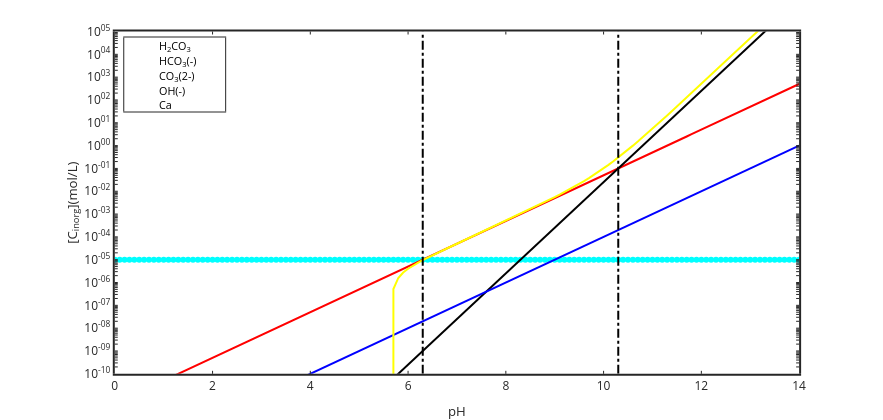

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10



h5 = -183.06


    legend at line 306 column 8

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10



In [4]:
% Refer to the plot codes of Scott

graphics_toolkit ("plotly");

pH=0:0.1:14;
H=10.^-pH;

H2CO3=K_H*pCO_2;
HCO3=(K_a1*H2CO3)./H;
CO3=(K_a2*HCO3)./H;
OH=K_w./H;
Ca=(K_a1*K_H*pCO_2)./H+2*((K_a2*K_a1*K_H*pCO_2)./H.^2)+K_w./H-H;

h1=semilogy(pH,H2CO3,'c.','linewidth',2);hold on;
h2=semilogy(pH,HCO3,'r-','linewidth',2);hold on;
h3=semilogy(pH,CO3,'k-','linewidth',2);hold on;
h4=semilogy(pH,OH,'b-','linewidth',2);hold on;
h5=semilogy(pH,Ca,'y-','linewidth',2)

xlabel('pH'); ylabel('[C_{inorg}](mol/L)')
legend('H_2CO_3','HCO_3(-)','CO_3(2-)','OH(-)','Ca','location','northwest')
legend ("autoupdate", "off");
set(gca,'linewidth',2,'fontsize',12);

semilogy([-log10(K_a1) -log10(K_a1)],[1e-10 1e5],'k-.','linewidth',2);
semilogy([-log10(K_a2) -log10(K_a2)],[1e-10 1e5],'k-.','linewidth',2);

axis([0 14 1e-10 1e5])